# Q5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
train_file = open('Q5_data/ml80.train')   ## size = 80,000
train_data = []

### converting dataset into int array
for i in train_file :
    temp = i.split()
    for j in range(len(temp)):
        temp[j] = int(temp[j])
    train_data.append(temp)
train_data = np.array(train_data)
print(train_data)
train_file.close()

num_users=  train_data[:,0].max()
num_movies =  train_data[:,1].max()

### zero matrix of size (num_users X num_movies)
final_train = np.zeros(((num_users, num_movies) ))

print(final_train.shape)
for i in range(len(train_data)):
#     fill the matrix with reviews as per traning data
    final_train[train_data[i][0] - 1][train_data[i][1] - 1] = int(train_data[i][2])

[[   1    1    5]
 [   1    2    3]
 [   1    3    4]
 ...
 [ 943 1188    3]
 [ 943 1228    3]
 [ 943 1330    3]]
(943, 1682)


In [4]:
test_file = open('Q5_data/ml20.test')   ## size = 80,000
test_data = []

### converting dataset into int array
for i in test_file :
    temp = i.split()
    for j in range(len(temp)):
        temp[j] = int(temp[j])
    test_data.append(temp)
test_data = np.array(test_data)
print(test_data)
test_file.close()

num_users=  test_data[:,0].max()
num_movies =  test_data[:,1].max()

### zero matrix of size (num_users X num_movies)
final_test = np.zeros(((num_users, num_movies) ))

print(final_test.shape)
for i in range(len(test_data)):
#     fill the matrix with reviews as per test data
    final_test[test_data[i][0] - 1][test_data[i][1] - 1] = int(test_data[i][2])

print(final_test)

[[  1   5   3]
 [  1  11   2]
 [  1  16   5]
 ...
 [875 772   5]
 [876 294   4]
 [877 382   3]]
(877, 1669)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# SVD Decomposition of a matrix Y is  UxSxV.t

Here U and V are orthogonal matrices and S is daigonal matrix


In [5]:
def K_Rank_Approx(k,X_train):
    
    U, S, V_t = np.linalg.svd(X_train,full_matrices=False)
    
    if k>=len(S):
        return X_train
    else:
        U_n = U[:,:k]
        S_n = np.diag(S[:k])
        V_n = V_t[:k,:]
        X = np.matmul(U_n,np.matmul(S_n,V_n))
    return X

In [6]:
K_Rank_Approx(5,final_train)

array([[ 3.23430743e+00,  1.43806522e+00,  1.23417265e+00, ...,
        -1.03312399e-02,  1.94909601e-02,  4.60322764e-02],
       [ 1.22586509e+00, -2.88083617e-01,  1.62581212e-01, ...,
         1.49902353e-02, -4.54857894e-03, -1.06344165e-02],
       [-2.86424303e-01,  9.54477175e-02, -9.04171302e-03, ...,
         2.26427980e-02,  1.49362140e-03, -8.45181606e-03],
       ...,
       [ 1.28642167e+00,  1.54788629e-03,  3.34304381e-01, ...,
        -1.20322740e-03, -1.14504978e-03,  3.32772850e-03],
       [ 6.20066221e-01,  3.23389177e-01, -4.04034378e-01, ...,
         2.12430213e-02,  6.48545771e-03, -2.47168101e-02],
       [ 2.83769505e+00,  1.81793313e+00,  1.02478113e+00, ...,
        -1.02142456e-02,  2.32845587e-02,  3.28301011e-02]])

# Low Rank Approx error

In [8]:
error = {i:0 for i in range(1,101)}
for k in [i for i in range(1,101)]:
    approx = K_Rank_Approx(k,final_train)
    temp = 0
    
    for i1 in range(final_test.shape[0]):
#         print(i1)
        for j in range(final_test.shape[1]):
#             print(j)
            if final_test[i1][j]!=0 :
                temp+= (approx[i1][j] - final_test[i1][j])**2
    error[k] = temp


# Baseline Error

In [13]:
mean_movies = final_train.mean(axis=1)   
mean_users = final_train.mean(axis=0) 
# print(mean_movies)
# print(mean_users)
baseline = []
for i in range(len(final_train)):
    for j in range(len(final_train[1])):
        baseline.append([mean_movies[i],mean_users[j],final_train[i][j]])
baseline= np.array(baseline)

testing = []
actual= []
for i in range(len(final_test)):
    for j in range(len(final_test[1])):
        if final_test[i][j]!=0:
            testing.append([mean_movies[i],mean_users[j],final_test[i][j]])
            actual.append(final_test[i][j])
            
testing = np.array(testing)
lr_model = LinearRegression(fit_intercept=False)
lr_model.fit(baseline[:,:2],baseline[:,2])
predicted = lr_model.predict(testing[:,:2])
error_baseline = mean_squared_error(predicted, actual)*len(actual)

# Graph Plotting

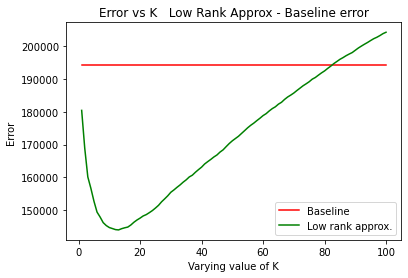

In [17]:
plt.plot([i+1 for i in range(100)], [ error_baseline for i in range(100)], color='red',label='Baseline')
plt.plot([i+1 for i in range(100)],[error[i+1] for i in range(100)], color = 'green',label='Low rank approx.')
plt.title('Error vs K   Low Rank Approx - Baseline error')
plt.xlabel('Varying value of K')
plt.ylabel('Error ')
plt.legend(loc='lower right')

# Best value of K can be seen near 16(minima)